<a href="https://colab.research.google.com/github/fxrdhan/Bike-Sharing-Demand-Prediction/blob/main/UCI_Bike_Sharing_Linear_Regression_FINAL_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Permintaan Sepeda Harian Menggunakan Regresi Linear Berganda**

**Dataset:** UCI Bike Sharing Dataset (level harian)

**Sumber Dataset:** https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

**Keterangan Pengerjaan**
- Kelompok: 1
- Anggota: Firdaus Arif Ramadhani (101032300131), Muhammad Fakhri Arrasyid (101032300150), Yoga Reswara (101032300119)
- Kelas: TK-47-04
- Dosen Pengampu: Dr. Budhi Irawan, S.Si., M.T
- Tahun Akademik: 2024/2025 (Semester 5)

## **BAB III — METODOLOGI PENELITIAN**

### **3.1 Alur Penelitian**

Tahapan penelitian diawali dengan mengunduh dataset dari UCI Machine Learning Repository. Setelah itu, data diperiksa untuk memastikan strukturnya benar dan tidak ada kesalahan. Karena data memiliki urutan waktu, pembagian data untuk pelatihan dan pengujian dilakukan berdasarkan waktu. Cara ini digunakan agar tidak terjadi kebocoran data, yaitu kondisi ketika informasi dari masa depan ikut digunakan saat melatih model sehingga hasilnya terlihat lebih baik dari yang sebenarnya.

Setelah data dipastikan valid, dilakukan proses pra-pemrosesan seperti menyesuaikan skala data numerik dan mengubah data kategorikal agar bisa dipahami oleh model. Selanjutnya, model regresi linear berganda dilatih menggunakan data pelatihan dan kemudian diuji menggunakan data pengujian untuk melihat seberapa baik performanya.

### **3.2 Dataset**
Dataset yang digunakan dalam penelitian ini adalah UCI Bike Sharing Dataset pada granularitas harian, yang berisi 731 hari observasi dalam periode 2011–2012. Variabel target yang menjadi fokus prediksi adalah `cnt` (total jumlah penyewa sepeda per hari). Fitur prediktor mencakup dimensi temporal (musim, bulan, hari kerja) dan dimensi meteorologi (suhu rata-rata, suhu yang dirasakan, kelembapan, dan kecepatan angin). Seluruh fitur ini dipilih berdasarkan asumsi teoritis bahwa pola permintaan layanan bike-sharing dipengaruhi oleh kondisi cuaca dan kalender aktivitas masyarakat.

### **3.3 Pra-pemrosesan Data**
Tahap pra-pemrosesan dirancang untuk menyiapkan data agar sesuai dengan asumsi dan kebutuhan algoritma pembelajaran mesin. Proses ini mencakup dua sub-tahapan utama.

Pertama, data dibagi menjadi set pelatihan dan pengujian dengan proporsi 80:20 berdasarkan urutan waktu . Strategi ini dipilih untuk menghindari data leakage dan mensimulasikan skenario prediksi praktis di mana model dilatih menggunakan data historis dan diuji pada data masa depan. Kedua, dilakukan transformasi fitur sesuai tipe data: fitur kategorikal ditransformasi menggunakan One-Hot Encoding agar tidak ada asumsi urutan hierarki antar kategori, sementara fitur numerik diskalakan menggunakan StandardScaler sehingga semua variabel berada pada rentang nilai yang setara (mean = 0, standard deviation = 1). Penskalaan ini penting untuk memastikan tidak ada fitur numerik tertentu yang mendominasi proses pembelajaran karena skala absolutnya.

### **3.4 Perancangan Sistem**
Desain sistem prediksi dalam penelitian ini mengadopsi paradigma pipeline dari scikit-learn, sebuah praktik standar dalam machine learning yang memastikan konsistensi tahapan transformasi data dan inferensi model. Pendekatan ini meminimalkan risiko kesalahan pada penanganan data, terutama ketika preprocessing dilakukan sebelum training, dan sekaligus memfasilitasi reprodusibilitas hasil.

#### **3.4.1 Spesifikasi Input dan Output**

Input sistem terdiri dari 11 fitur prediktor yang meliputi variabel temporal (musim, bulan, hari libur, hari kerja, tahun) dan variabel meteorologi (suhu, suhu yang dirasakan, kelembapan, kecepatan angin, situasi cuaca). Sebelum memasuki tahap pelatihan, beberapa kolom dihilangkan untuk menghindari data leakage: kolom `dteday` (tanggal, yang redundan setelah time-based split), kolom `casual` dan `registered` (yang merupakan komponen pembentuk target `cnt`), serta kolom `instant` (sekadar indeks baris). Output sistem berupa nilai numerik kontinu yang merepresentasikan estimasi jumlah penyewa sepeda harian.

#### **3.4.2 Arsitektur Model**

Arsitektur sistem pipeline disusun dalam urutan sebagai berikut: tahap pertama adalah ColumnTransformer yang melakukan penskalaan fitur numerik (StandardScaler) dan enkoding fitur kategorikal (OneHotEncoder dengan `drop='first'` untuk menghindari dummy trap). Tahap kedua adalah model regresi linear berganda berbasis Ordinary Least Squares (OLS), yang merupakan model linear sederhana namun interpretabel untuk masalah ini.

#### **3.4.3 Kriteria Keberhasilan**

Model dianggap memenuhi kriteria keberhasilan apabila menunjukkan performa generalisasi pada data test yang lebih baik dibandingkan baseline naif (prediksi nilai rata-rata target dari data training). Evaluasi menggunakan tiga metrik: (1) R² untuk mengukur proporsi variansi target yang tertangkap, (2) Root Mean Squared Error (RMSE) sebagai penalti untuk error besar, dan (3) Mean Absolute Error (MAE) untuk interpretasi error rata-rata dalam unit asli. Selain metrik statistik, analisis diagnostik dilakukan melalui inspeksi plot residual. Residual yang terdistribusi secara acak di sekitar nol tanpa pola sistematis mengindikasikan kecocokan (goodness-of-fit) model yang memadai. Sebaliknya, pola berbentuk corong (heteroskedastisitas) atau trend dapat mengisyaratkan adanya non-linearitas atau struktur yang tidak tertangkap oleh model linear, yang akan menjadi pertimbangan untuk pengembangan model di masa depan.

## **BAB IV — IMPLEMENTASI DAN PENGUJIAN**


### **4.1 Lingkungan Pengembangan**

Lingkungan pengembangan terdiri dari Python 3.12 dengan paket-paket pendukung sebagai berikut. Pandas dan NumPy digunakan untuk operasi manipulasi dan komputasi numerik data. Scikit-learn menyediakan utilitas preprocessing (ColumnTransformer, OneHotEncoder, StandardScaler) dan model machine learning (LinearRegression). Matplotlib digunakan untuk visualisasi data dan diagnostik model. Versi spesifik setiap paket ditampilkan pada output code cell berikut.

In [45]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Library ML (scikit-learn)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# plot style
plt.style.use("seaborn-v0_8")

print("Python:", platform.python_version())
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)


Python: 3.12.12
numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1


### **4.2 Implementasi Sistem**


#### **4.2.1 Ambil Dataset dari UCI**

Dataset diunduh langsung dari repositori UCI Machine Learning dalam format arsip ZIP, kemudian diekstrak dan dimuat ke dalam dataframe pandas untuk pemrosesan selanjutnya.

In [46]:
import zipfile
import urllib.request

# Download zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
urllib.request.urlretrieve(url, "bike_sharing.zip")

# Extract
with zipfile.ZipFile("bike_sharing.zip", 'r') as zip_ref:
    zip_ref.extractall("bike_data")

# Read day.csv
df = pd.read_csv("bike_data/day.csv")

In [47]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **4.2.2 Data Understanding**


Sebelum membangun model, dilakukan pemeriksaan struktur dan validasi data untuk memastikan kualitas input. Melihat data awal, teridentifikasi bahwa kolom `casual` dan `registered` merupakan komponen penyusun target `cnt` (dengan hubungan `cnt = casual + registered`). Kolom-kolom ini harus dihilangkan dari fitur prediktor untuk menghindari kebocoran data yang berarti kondisi di mana informasi tentang target sudah tersedia sebagai fitur, sehingga model tidak belajar pola prediktif yang sebenarnya melainkan hanya mempelajari hubungan aritmetis yang sudah diketahui sebelumnya. Demikian pula, kolom `instant` (sekadar indeks baris) dan `dteday` (tanggal mentah, yang redundan setelah dilakukan time-based split) dieliminasi.

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil eksplorasi, target prediksi adalah kolom `cnt` yang merepresentasikan total penyewaan harian. Kolom `dteday` berfungsi sebagai indeks temporal untuk melakukan time-based split, namun dihilangkan sebelum pelatihan karena redundan. Kolom `casual` dan `registered`, yang merupakan komponen konstituen dari `cnt`, tidak dimasukkan sebagai fitur input guna mencegah data leakage. Begitu pula kolom `instant` hanya berfungsi sebagai identitas baris dan tidak memiliki nilai prediktif sehingga dihilangkan dari feature set.

In [49]:
# Cek data hilang
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [50]:
# Cek duplikasi baris
df.duplicated().sum()

np.int64(0)

#### **4.2.3 Pembagian Data Berbasis Waktu**

Mengingat karakteristik temporal data, strategi pembagian data tidak menggunakan random split, melainkan holdout berbasis waktu. Data diurutkan menurut kolom `dteday`, kemudian dibagi dengan proporsi 80% untuk set pelatihan (data awal) dan 20% untuk set pengujian (data akhir). Hal ini memastikan bahwa model dilatih pada data historis dan dievaluasi pada data yang lebih baru, sehingga simulasi lebih mendekati skenario praktik prediksi kasus nyata di mana prediksi dilakukan untuk periode yang belum terjadi. Dalam dataset ini yang mencakup periode Januari 2011 hingga Desember 2012, split menghasilkan set pelatihan dari awal 2011 hingga awal Agustus 2012, dan set pengujian dari pertengahan Agustus 2012 hingga akhir 2012.


In [51]:
df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")
df = df.sort_values("dteday").reset_index(drop=True)

print(f"Rentang temporal dataset:")
print(f"  Tanggal awal: {df['dteday'].min().date()}")
print(f"  Tanggal akhir: {df['dteday'].max().date()}")

Rentang temporal dataset:
  Tanggal awal: 2011-01-01
  Tanggal akhir: 2012-12-31


In [52]:
split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx].copy()
test_df = df.iloc[split_idx:].copy()

# Drop kolom yang tidak dipakai sebagai fitur (anti-leakage + kolom ID)
drop_cols = ["cnt", "dteday", "instant", "casual", "registered"]
X_train = train_df.drop(columns=drop_cols)
y_train = train_df["cnt"]

X_test = test_df.drop(columns=drop_cols)
y_test = test_df["cnt"]

{
    'X_train': X_train.shape,
    'X_test': X_test.shape,
    'train_range': (train_df['dteday'].min().date(), train_df['dteday'].max().date()),
    'test_range': (test_df['dteday'].min().date(), test_df['dteday'].max().date()),
}


{'X_train': (584, 11),
 'X_test': (147, 11),
 'train_range': (datetime.date(2011, 1, 1), datetime.date(2012, 8, 6)),
 'test_range': (datetime.date(2012, 8, 7), datetime.date(2012, 12, 31))}

#### **4.2.4 EDA**

Eksplorasi data awal (Exploratory Data Analysis / EDA) dilakukan untuk memahami karakteristik distribusi target, hubungan antar fitur dan target, serta pola temporal yang mungkin ada dalam data. Pemahaman ini membantu validasi asumsi model dan mengidentifikasi potensi tantangan dalam modeling.


**(1) Distribusi `cnt` (histogram)**

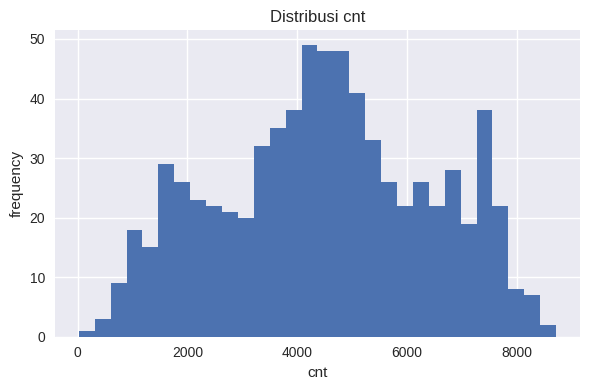

In [53]:
plt.figure(figsize=(6, 4))
df["cnt"].hist(bins=30)
plt.title("Distribusi cnt")
plt.xlabel("cnt")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()


In [54]:
print("Statistik Deskriptif Variabel Target (cnt)")
print(df["cnt"].describe())
print("\nQuartiles:")
print(f"Q1 (25%): {df['cnt'].quantile(0.25):.0f}")
print(f"Median (50%): {df['cnt'].quantile(0.50):.0f}")
print(f"Q3 (75%): {df['cnt'].quantile(0.75):.0f}")
print(f"Min: {df['cnt'].min()}")
print(f"Max: {df['cnt'].max()}")

Statistik Deskriptif Variabel Target (cnt)
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

Quartiles:
Q1 (25%): 3152
Median (50%): 4548
Q3 (75%): 5956
Min: 22
Max: 8714


Distribusi target `cnt` menunjukkan skewness positif (right-skewed), artinya mayoritas observasi terkonsentrasi pada rentang permintaan menengah, sementara observasi dengan permintaan sangat tinggi memiliki frekuensi yang lebih rendah. Statistik deskriptif menunjukkan Q1 ≈ 3152, median ≈ 4548, Q3 ≈ 5956, dengan nilai maksimum melampaui 8000 penyewaan. Karakteristik distribusi dengan ekor panjang ini merupakan indikasi heteroskedastisitas potensial—variansi error cenderung meningkat pada nilai prediksi tinggi. Fenomena ini relevan untuk interpretasi metrik evaluasi, khususnya RMSE yang memberikan penalti lebih besar pada error besar (yang lebih sering terjadi pada permintaan tinggi).

**(2) Korelasi cuaca vs `cnt` (numerik)**

In [55]:
num_cols_simple = ["temp", "atemp", "hum", "windspeed"]
df[num_cols_simple + ["cnt"]].corr()


,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


Analisis korelasi Pearson antara fitur meteorologi dan target mengungkapkan beberapa pola. Kedua metrik suhu (`temp` dan `atemp`) menunjukkan korelasi positif moderat-kuat dengan `cnt` (≈ 0.63), mengisyaratkan bahwa hari dengan kondisi lebih hangat cenderung mengalami permintaan penyewaan yang lebih tinggi. Sebaliknya, `windspeed` dan `hum` (kelembapan) memiliki korelasi negatif (≈ -0.23 dan -0.10 secara berturut-turut), mengindikasikan bahwa kondisi angin tinggi dan kelembapan tinggi cenderung menekan permintaan. Pengamatan penting adalah bahwa `temp` dan `atemp` juga memiliki korelasi sangat tinggi satu sama lain (0.99), menandakan multikolinearitas. Hal ini berpotensi membuat estimasi koefisien regresi untuk kedua variabel menjadi tidak stabil atau sulit diinterpretasikan, sebuah aspek yang akan dipertimbangkan dalam rekomendasi pengembangan model.

**(3) Pola musiman (bulan & season)**

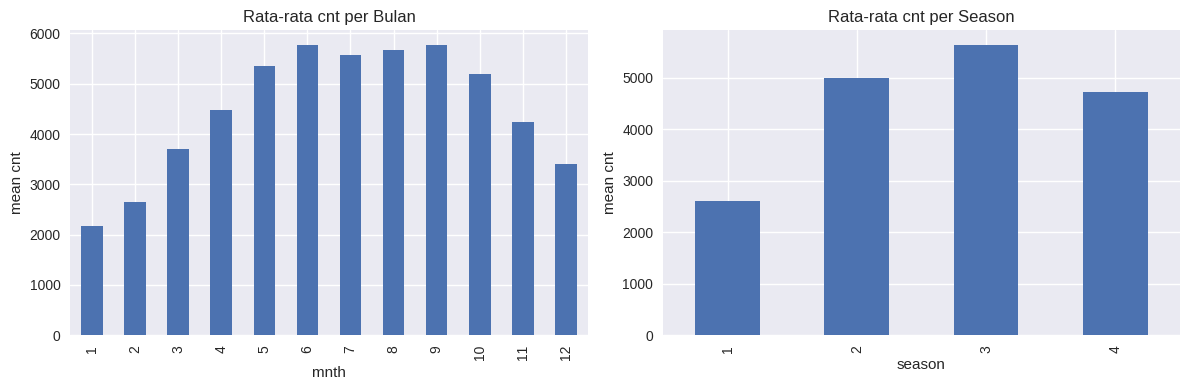

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df.groupby("mnth")["cnt"].mean().plot(kind="bar", ax=ax[0], title="Rata-rata cnt per Bulan")
ax[0].set_xlabel("mnth")
ax[0].set_ylabel("mean cnt")

df.groupby("season")["cnt"].mean().plot(kind="bar", ax=ax[1], title="Rata-rata cnt per Season")
ax[1].set_xlabel("season")
ax[1].set_ylabel("mean cnt")

plt.tight_layout()
plt.show()

Analisis permintaan berdasarkan dimensi temporal mengungkapkan pola musiman yang jelas. Permintaan rata-rata per bulan menunjukkan puncak pada bulan-bulan pertengahan tahun (Mei, Juni, Agustus, September), sementara permintaan terendah terjadi pada bulan-bulan awal tahun (Januari, Februari). Ketika dikelompokkan per musim (season), kategori 3 (fall/musim gugur) menunjukkan permintaan rata-rata tertinggi, sedangkan kategori 1 (spring/musim semi) paling rendah. Pola musiman ini konsisten dengan intuisi bahwa cuaca yang lebih baik dan suasana sosial (misalnya liburan sekolah, perjalanan) mempengaruhi propensity individu untuk menyewa sepeda. Temuan ini memperkuat rasionalisasi penggunaan fitur-fitur kategorikal temporal (`mnth`, `season`, `weekday`, `holiday`, `workingday`) sebagai prediktor dalam model.

#### **4.2.5 Preprocessing Pipeline (One-hot + Scaling)**

Pipeline preprocessing dirancang dengan strategi diferensiasi berdasarkan tipe data. Fitur kategorikal (`season`, `mnth`, `weekday`, `weathersit`, `holiday`, `workingday`, `yr`) ditransformasi menggunakan One-Hot Encoding dengan `drop='first'` untuk menghindari dummy variable trap. Fitur numerik (`temp`, `atemp`, `hum`, `windspeed`) diskalakan menggunakan StandardScaler untuk memastikan mean 0 dan standard deviation 1, sehingga tidak ada fitur yang mendominasi proses learning karena besarnya skala absolut. Parameter `remainder='drop'` memastikan fitur lain yang tidak terdaftar dalam transformers akan dihilangkan, menjaga konsistensi feature set.


In [57]:
cat_cols = ["season", "mnth", "weekday", "weathersit", "holiday", "workingday", "yr"]
num_cols = ["temp", "atemp", "hum", "windspeed"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

#### **4.2.6 Model Regresi Linear**

Model linear dalam penelitian ini menggunakan algoritma Linear Regression berbasis Ordinary Least Squares (OLS), dipilih karena kesederhanaan, interpretabilitas tinggi, dan performa yang reasonable. Model ini diintegrasikan ke dalam pipeline scikit-learn sehingga preprocessing dan modeling berjalan secara seamless.

In [58]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("lr", LinearRegression()),
])

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

### **4.3 Skenario Pengujian**

Skenario pengujian dirancang untuk mengevaluasi kemampuan model dalam melakukan generalisasi pada data yang tidak pernah dilihat selama pelatihan, yaitu sebuah simulasi dari kondisi praktis di mana model digunakan untuk melakukan prediksi pada periode masa depan. Pengujian dilakukan dengan proporsi 80% training dan 20% testing dengan pendekatan berbasis urutan waktu sebagaimana telah dijelaskan pada sub-bagian sebelumnya.

Evaluasi model melibatkan tiga kelompok analisis. Pertama, perhitungan metrik kuantitatif: koefisien determinasi (R²) mengukur proporsi variansi target yang dijelaskan model, Root Mean Squared Error (RMSE) memberikan penalti eksponensial pada error besar, dan Mean Absolute Error (MAE) mengukur magnitude error rata-rata dalam unit asli. Kedua, perbandingan performa terhadap baseline naif: prediksi konstan (nilai rata-rata target pada training set), sehingga dapat ditelusuri seberapa jauh improvement yang dihasilkan fitur-fitur prediktor. Ketiga, analisis diagnostik residual melalui plot untuk mendeteksi pola sistematis atau penyimpangan dari asumsi linear regression (seperti heteroskedastisitas).

#### **4.3.1 Evaluasi (R², RMSE, MAE)**

Perhitungan metrik evaluasi dilakukan pada set training dan testing. Selain itu, dihitung juga metrik untuk model baseline: prediksi konstan yang selalu menghasilkan nilai rata-rata target dari set training. Perbandingan ini membantu menentukan apakah fitur-fitur prediktor memberikan nilai tambah dibandingkan prediksi naif.

In [59]:
def regression_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

r2_tr, rmse_tr, mae_tr = regression_metrics(y_train, pred_train)
r2_te, rmse_te, mae_te = regression_metrics(y_test, pred_test)

print(f"TRAIN  R2: {r2_tr:.4f} | RMSE: {rmse_tr:.2f} | MAE: {mae_tr:.2f}")
print(f"TEST   R2: {r2_te:.4f} | RMSE: {rmse_te:.2f} | MAE: {mae_te:.2f}")


TRAIN  R2: 0.8557 | RMSE: 678.94 | MAE: 506.04
TEST   R2: 0.6540 | RMSE: 1102.66 | MAE: 803.63


#### **4.3.2 Baseline Pembanding (Prediksi Rata-rata)**

Model baseline menggunakan strategi prediksi sederhana dimana semua sampel dalam test set diprediksi dengan nilai yang sama, yaitu rata-rata target dari set training. Jika nilai R² baseline bernilai negatif, artinya model baseline (prediksi konstan) lebih buruk daripada menggunakan rata-rata target pada test set itu sendiri. Nilai R² negatif pada baseline mengindikasikan bahwa data training memiliki distribusi yang signifikan berbeda dari test, dan dengan demikian, model yang mampu menangkap pola spesifik (seperti musiman dan pengaruh cuaca) akan memberikan improvement yang nyata.


In [60]:
baseline_pred = np.repeat(y_train.mean(), len(y_test))
r2_b, rmse_b, mae_b = regression_metrics(y_test, baseline_pred)

print(f"BASELINE TEST R2: {r2_b:.4f} | RMSE: {rmse_b:.2f} | MAE: {mae_b:.2f}")

BASELINE TEST R2: -0.8657 | RMSE: 2560.56 | MAE: 2290.41


### **4.4 Hasil dan Analisis**

#### **4.4.1 Ringkasan Hasil Pengujian**

Bagian ini menyajikan hasil evaluasi model melalui dua tahap. Pertama, ditampilkan ringkasan metrik pada data *train*, *test*, dan *baseline_test* untuk melihat kualitas prediksi secara umum serta membandingkannya dengan baseline. Kedua, dilakukan analisis error lebih rinci pada data uji untuk mengidentifikasi pola kesalahan dan potensi keterbatasan model pada kondisi tertentu.

Pada Tabel Metrik, performa dievaluasi menggunakan:
- R² untuk mengukur seberapa baik model menjelaskan variasi data,
- RMSE dan MAE untuk mengukur besarnya kesalahan prediksi dalam satuan *penyewaan/hari*.

In [61]:
metrics_df = pd.DataFrame(
    {
        "split": ["train", "test", "baseline_test"],
        "r2": [r2_tr, r2_te, r2_b],
        "rmse": [rmse_tr, rmse_te, rmse_b],
        "mae": [mae_tr, mae_te, mae_b],
    }
).set_index("split")

metrics_df.round(4)

,r2,rmse,mae
split,,,
train,0.8557,678.9432,506.0428
test,0.6540,1102.6622,803.6255
baseline_test,-0.8657,2560.5558,2290.4127


Berdasarkan hasil pada data pelatihan, model Regresi Linear menunjukkan performa yang baik (**R² = 0.8557**, **RMSE = 678.94**, **MAE = 506.04**), yang mengindikasikan bahwa hubungan antara fitur dan target cukup tertangkap oleh model. Pada data pengujian, performa menurun (**R² = 0.6540**, **RMSE = 1102.66**, **MAE = 803.63**). Penurunan ini mengindikasikan bahwa kemampuan generalisasi model lebih rendah dibanding saat pelatihan, yang dapat dipengaruhi oleh perbedaan karakteristik data *train* dan *test* atau adanya pola non-linear yang tidak sepenuhnya dapat dimodelkan oleh regresi linear.

Meskipun demikian, bila dibandingkan dengan baseline naif, model masih memberikan peningkatan yang signifikan. Baseline pada data test menghasilkan **R² negatif (-0.8657)** dengan error yang jauh lebih besar (**RMSE = 2560.56**, **MAE = 2290.41**). R² negatif menunjukkan bahwa baseline lebih buruk daripada prediksi sederhana seperti menggunakan nilai rata-rata, sehingga model Regresi Linear dapat dinyatakan memberikan nilai tambah yang jelas.

Setelah memperoleh gambaran umum dari metrik agregat pada tabel, langkah berikutnya adalah mengevaluasi error secara lebih detail. Hal ini penting karena metrik rata-rata dapat menyamarkan kondisi tertentu (misalnya saat permintaan sangat rendah) yang berpotensi menghasilkan kesalahan ekstrem. Oleh karena itu, berikutnya adalah menganalisa output Test Set Error Analysis.


In [67]:
mape = np.mean(np.abs((y_test - pred_test) / y_test)) * 100
rmse_pct = (rmse_te / y_test.mean()) * 100
mae_pct = (mae_te / y_test.mean()) * 100

print(f"Test Set Error Analysis:")
print(f"  MAE: {mae_te:.2f} penyewaan/hari")
print(f"  RMSE: {rmse_te:.2f} penyewaan/hari")
print(f"  MAPE: {mape:.2f}%")
print(f"  MAE relatif mean: {mae_pct:.2f}%")
print(f"  RMSE relatif mean: {rmse_pct:.2f}%")
print(f"\nTarget Range Statistics:")
print(f"  Min: {y_test.min():.0f}")
print(f"  Max: {y_test.max():.0f}")
print(f"  Mean: {y_test.mean():.2f}")
print(f"  Std: {y_test.std():.2f}")
print(f"\nError Range:")
print(f"  MAE worst case (low demand): ~{(804/y_test.min())*100:.1f}% (jika actual={y_test.min():.0f})")
print(f"  MAE best case (high demand): ~{(804/y_test.max())*100:.1f}% (jika actual={y_test.max():.0f})")

Test Set Error Analysis:
  MAE: 803.63 penyewaan/hari
  RMSE: 1102.66 penyewaan/hari
  MAPE: 139.98%
  MAE relatif mean: 13.63%
  RMSE relatif mean: 18.70%

Target Range Statistics:
  Min: 22
  Max: 8714
  Mean: 5897.80
  Std: 1881.03

Error Range:
  MAE worst case (low demand): ~3654.5% (jika actual=22)
  MAE best case (high demand): ~9.2% (jika actual=8714)


Pada data pengujian, model menghasilkan **MAE = 803.63 penyewaan/hari** dan **RMSE = 1102.66 penyewaan/hari**. Secara interpretatif, MAE menunjukkan rata-rata deviasi prediksi terhadap nilai aktual, sedangkan RMSE memberi penalti lebih besar terhadap error yang ekstrem. Nilai RMSE yang lebih tinggi daripada MAE mengindikasikan adanya beberapa observasi dengan kesalahan prediksi yang relatif besar.

Untuk memahami konteks besaran error, digunakan ukuran relatif terhadap rata-rata target (mean) pada data uji. Dengan **mean target = 5897.80**, diperoleh:
- **MAE relatif mean = 13.63%**
- **RMSE relatif mean = 18.70%**

Hasil ini menunjukkan bahwa secara rata-rata, kesalahan model berada pada kisaran 13–19% dari skala rata-rata permintaan harian, sehingga performa model dapat dianggap cukup memadai pada skala umum.

Namun, metrik **MAPE = 139.98%** juga sangat tinggi. Nilai ini perlu ditafsirkan secara hati-hati karena MAPE sangat sensitif terhadap nilai aktual yang kecil (karena error dibagi dengan nilai aktual). Statistik rentang target pada data uji menunjukkan adanya nilai minimum yang sangat rendah (**min = 22**) dan nilai maksimum yang tinggi (**max = 8714**). Kondisi ini menyebabkan persentase error menjadi tidak stabil.

Hal tersebut tercermin pada estimasi rentang error:
- Pada kondisi permintaan rendah (**actual = 22**), error setara MAE dapat menghasilkan persentase kesalahan sekitar **~3654.5%**
- Pada kondisi permintaan tinggi (**actual = 8714**), error setara MAE hanya sekitar **~9.2%**

Dengan demikian, tingginya MAPE lebih banyak dipengaruhi oleh keberadaan observasi dengan permintaan sangat rendah, bukan semata-mata karena performa model selalu buruk. Artinya, MAPE dalam konteks ini lebih merepresentasikan sensitivitas model terhadap kasus *low demand* dibandingkan ringkasan performa keseluruhan.


#### **4.4.2 Analisis dan Plot Aktual vs Prediksi**

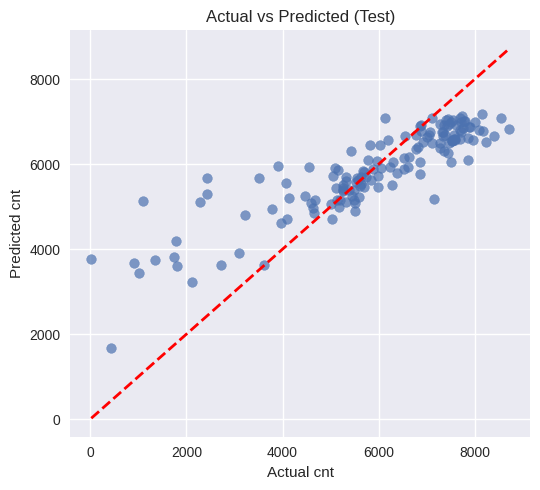

In [70]:
plt.figure(figsize=(5.5, 5))
plt.scatter(y_test, pred_test, alpha=0.7)

min_val = min(y_test.min(), pred_test.min())
max_val = max(y_test.max(), pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.title("Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()

Visualisasi scatter plot antara nilai aktual dan prediksi menunjukkan bahwa model mampu menangkap tren umum permintaan, meskipun dengan variabilitas yang cukup. Titik-titik plot yang terkonsentrasi di sekitar garis diagonal menunjukkan prediksi yang akurat, sementara penyebaran di sekitar garis mencerminkan error. Dari plot ini terlihat bahwa model cenderung melakukan underprediction pada permintaan tinggi dan overprediction pada permintaan rendah.

#### **4.4.3 Diagnostik Residual**

**(1) Residual vs Predicted**

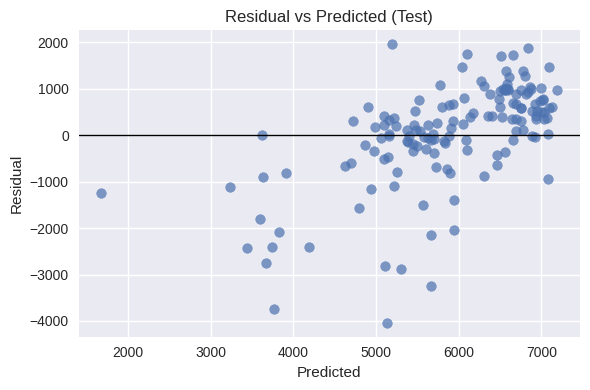

In [64]:
resid = y_test - pred_test

plt.figure(figsize=(6, 4))
plt.scatter(pred_test, resid, alpha=0.7)
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual vs Predicted (Test)")
plt.tight_layout()
plt.show()

**(2) Histogram residual**

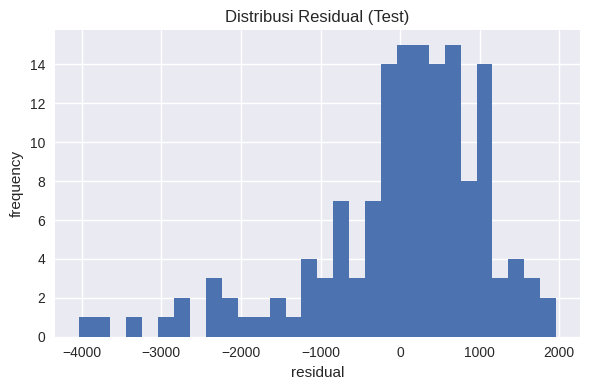

Residual mean: 20.16 | std: 1106.25 | skew: -1.31
Outlier |resid| > 3σ: 2 | corr(|resid|, pred): -0.252


In [65]:
plt.figure(figsize=(6, 4))
pd.Series(resid).hist(bins=30)
plt.title("Distribusi Residual (Test)")
plt.xlabel("residual")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

# Ringkasan statistik residual
resid_s = pd.Series(resid)
outlier_3sigma = int((resid_s.abs() > 3 * resid_s.std()).sum())
corr_abs = float(np.corrcoef(np.abs(resid), pred_test)[0, 1])
print(f"Residual mean: {resid_s.mean():.2f} | std: {resid_s.std():.2f} | skew: {resid_s.skew():.2f}")
print(f"Outlier |resid| > 3σ: {outlier_3sigma} | corr(|resid|, pred): {corr_abs:.3f}")


Analisis plot residual mengungkapkan beberapa observasi penting. Pertama, dari plot residual versus nilai prediksi, terlihat indikasi pola corong (funnel shape) yang mengisyaratkan heteroskedastisitas dimana variansi error meningkat seiring dengan meningkatnya nilai prediksi. Fenomena ini konsisten dengan sifat distribusi target yang memiliki ekor panjang. Kedua, distribusi residual menunjukkan skewness negatif (skewness = -1.31), dengan rata-rata mendekati nol (20.16, yang praktis dapat dianggap nol mengingat unit scale). Teridentifikasi dua outlier ekstrem (|residual| > 3σ), namun secara umum sebaran residual tidak menunjukkan pola sistematis yang jelas.

Secara ringkas, diagnostik residual mengindikasikan bahwa model linear telah menangkap struktur linear dalam data, namun masih ada pola non-linear residual (terutama heteroskedastisitas) yang tidak tertangkap. Ini adalah observations yang wajar pada data count/time-series, dan membuka peluang untuk pengembangan model lebih lanjut menggunakan regularisasi (Ridge/Lasso) atau transformasi fitur non-linear.

#### **4.4.4 Interpretasi Koefisien**

Interpretasi koefisien regresi memerlukan pemahaman tentang skala fitur. Untuk fitur numerik yang telah diskalakan dengan StandardScaler, koefisien merepresentasikan perubahan dalam target `cnt` ketika fitur naik sebesar satu standar deviasi. Untuk fitur kategorikal yang ditransformasi dengan One-Hot Encoding (dengan `drop='first'`), koefisien merepresentasikan selisih permintaan relatif terhadap kategori baseline (kategori yang di-drop). Sebagai contoh, koefisien untuk `mnth_9` berarti selisih permintaan pada bulan September dibandingkan bulan Januari (baseline).

In [66]:
# Lihat kategori baseline (yang di-drop) untuk tiap fitur kategorikal
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
baseline_category = {col: cats[0] for col, cats in zip(cat_cols, ohe.categories_)}
print("Baseline category (yang di-drop):")
for col, base in baseline_category.items():
    print(f"- {col}: {base}")

# Ambil nama fitur hasil preprocessing + koefisien model
feature_names = model.named_steps["preprocess"].get_feature_names_out()
feature_names = [name.replace("num__", "").replace("cat__", "") for name in feature_names]
coefs = model.named_steps["lr"].coef_

coef_df = (
    pd.DataFrame({"feature": feature_names, "coef": coefs})
    .sort_values("coef", ascending=False)
    .reset_index(drop=True)
)

print("\nTop 3 koefisien positif:")
print(coef_df.head(3).to_string(index=False))
print("\nTop 3 koefisien negatif:")
print(coef_df.tail(3).sort_values("coef").to_string(index=False))

coef_df.head(15)


Baseline category (yang di-drop):
- season: 1
- mnth: 1
- weekday: 0
- weathersit: 1
- holiday: 0
- workingday: 0
- yr: 0

Top 3 koefisien positif:
feature        coef
   yr_1 2039.968257
 mnth_9 1372.899732
 mnth_5 1191.631366

Top 3 koefisien negatif:
     feature         coef
weathersit_3 -1714.401235
weathersit_2  -389.274224
         hum  -194.830150


,feature,coef
0,yr_1,2039.968257
1,mnth_9,1372.899732
2,mnth_5,1191.631366
3,mnth_6,1135.744218
4,mnth_10,1085.712641
5,season_4,1044.358358
6,mnth_8,959.002731
7,mnth_4,801.920477
8,mnth_7,758.038818
9,mnth_3,730.516346



Analisis koefisien menunjukkan fitur-fitur yang paling berpengaruh. Koefisien positif terbesar adalah `yr_1` (≈ +2040), mengindikasikan bahwa tahun 2012 memiliki permintaan rata-rata ~2040 penyewaan per hari lebih tinggi dibandingkan 2011, mencerminkan pertumbuhan organik dalam penggunaan layanan. Fitur musiman juga menunjukkan efek kuat: bulan Mei, Juni, Agustus, dan September memiliki koefisien positif besar (±1000–1400), mengkonfirmasi pola seasonal yang dilihat dalam EDA. Sebaliknya, koefisien negatif terbesar adalah cuaca buruk (`weathersit_3` ≈ -1714), mengindikasikan penurunan drastis permintaan pada kondisi cuaca sangat buruk. Kelembapan juga menunjukkan efek negatif, dengan koefisien ≈ -195 per standar deviasi, berarti semakin lembap maka permintaan cenderung lebih rendah.

## **BAB V — PENUTUP**

### **5.1 Kesimpulan**
Penelitian ini telah berhasil mengembangkan dan mengevaluasi model Linear Regression untuk memprediksi permintaan penyewaan sepeda harian pada dataset UCI Bike Sharing. Model yang diimplementasikan mengintegrasikan preprocessing diferensiasi (StandardScaler untuk fitur numerik dan One-Hot Encoding untuk fitur kategorikal) dengan algoritma regresi linear berganda berbasis OLS.

Hasil eksperimen menunjukkan bahwa model mencapai R² = 0.6540 pada test set, dengan RMSE = 1102.66 dan MAE = 803.63 penyewaan per hari. Performa ini secara substansial melampaui baseline naif (R² = -0.8657), membuktikan bahwa fitur-fitur prediktor (cuaca dan temporal) memiliki daya prediktif yang signifikan. Analisis koefisien mengonfirmasi bahwa dimensi musiman (bulan, musim) dan meteorologi (suhu, kelembapan, cuaca) adalah faktor utama yang menggerakkan permintaan, sejalan dengan teori dan pengalaman praktis dalam studi bike-sharing systems.

Meskipun model linear mencapai performa yang reasonable, analisis residual mengungkapkan adanya heteroskedastisitas dan underprediction pada permintaan tinggi, mengisyaratkan bahwa pola non-linear masih belum sepenuhnya tertangkap. Dengan demikian, model ini layak dipandang sebagai baseline yang kuat dan interpretabel, membuka peluang untuk eksperimen lebih lanjut dengan regularisasi atau model non-linear.
### **5.2 Saran**
Berdasarkan hasil analisis dan observasi atas limitation model linear baseline, berikut adalah rekomendasi untuk pengembangan model di masa depan:

**Mengatasi Multikolinearitas:** Fitur-fitur suhu (`temp` dan `atemp`) menunjukkan korelasi sangat tinggi (0.99), yang mengakibatkan potensi instabilitas estimasi koefisien. Dua pendekatan dapat diterapkan: (1) menghilangkan salah satu fitur suhu dan membandingkan performa, atau (2) menerapkan teknik regularisasi (Ridge Regression atau Lasso) yang secara eksplisit memberikan penalti pada magnitude koefisien, sehingga menurunkan sensitivitas terhadap multikolinearitas.

**Ekspansi Model Linear:** Untuk menangkap pola non-linear sambil tetap mempertahankan interpretabilitas, dapat diterapkan teknik PolynomialFeatures (derajat 2) yang menciptakan fitur-fitur interaksi dan kuadrat. Pendekatan ini masih termasuk dalam framework linear regression namun dengan dimensi feature space yang lebih tinggi.

**Feature Engineering:** Eksplorasi lebih lanjut terhadap feature engineering yang relevan secara kontekstual dapat dilakukan, seperti: (1) interaksi antara musim dan kondisi cuaca (misalnya, efek cuaca mungkin berbeda di musim yang berbeda), (2) detrending atau pemodelan tren temporal eksplisit untuk menangkap pertumbuhan long-term, (3) lag features (permintaan hari sebelumnya) untuk menangkap autokorelasi temporal.

**Eksplorasi Model Non-linear:** Mengingat heteroskedastisitas dan pola non-linear yang masih tersisa, dapat dipertimbangkan model alternatif seperti Generalized Linear Models (GLM) dengan distribusi Poisson atau Negative Binomial (lebih sesuai untuk count data), atau Gradient Boosting models yang secara natural menangkap non-linearitas kompleks.

## **DAFTAR PUSTAKA**

1. Fanaee-T, H., & Gama, J. **Bike Sharing Dataset**. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
2. scikit-learn Documentation: **LinearRegression**, **Pipeline**, **ColumnTransformer**, **OneHotEncoder**, **StandardScaler**. https://scikit-learn.org/stable/
3. James, G., Witten, D., Hastie, T., & Tibshirani, R. *An Introduction to Statistical Learning* (bab Regresi Linear).
